In [158]:
%matplotlib inline
from utils import *

## Neuron params

In [171]:
# Default params
R_m = 142 * 1e6                                     # 142 MΩ
V_th = 15 * 1e-3                                    # 15 mV
tau_m = 24 * 1e-3                                   # 24 ms
f = 5                                               # 5 Hz
T = 1 / f
omega = 2 * np.pi * f                               # 5 Hz in rad/s
I_osc = 40 * 1e-12                                  # 40 pA
M = 5                                               # number of input levels
range_frac = 0.999                                  # fraction of range to use
sigma_w_avg = 0.0135                                # average sigma_w
eta = sigma_w_to_eta(sigma_w_avg, V_th, tau_m, f)   # noise strength
eta = 0.3
I_s = get_avg_Is(V_th, R_m, tau_m, f)
I_min, I_max = get_automatic_range(R_m, V_th, tau_m, 2*np.pi*1, I_osc, range_frac)
I_s = np.linspace(I_min, I_max, 5)[1]
I_s_ref, _ = get_automatic_range(R_m, V_th, tau_m, 2*np.pi*1, I_osc, range_frac)

## A - Example of average V(t) trajectory and variance increasing with time (shaded), and slope of dV/dt at V_th

In [175]:
# Time parameters
dt = 1e-4                    # Time step for numerical integration
time = np.arange(0, 2*T, dt)

V_traj = compute_mu_V_through_time(R_m, V_th, tau_m, I_s, I_osc, f, time)
V_sigma = np.sqrt(compute_sigma_V_through_time(V_th, eta, tau_m, I_s, I_s_ref, time))

In [161]:
# Simulations

num_trials = 1000

_, v_traj, _, phi_0 = simulate_neurons(R_m, V_th, eta, tau_m, omega, I_s, I_s_ref, I_osc, f, M, dt, time, num_trials, True, False, True)
var_v_through_t = np.std(v_traj, axis=1)
#for v_tr in v_traj.T:
    #plt.plot(t, v_tr, color='#5D9CA2', alpha=0.2, linewidth=1)

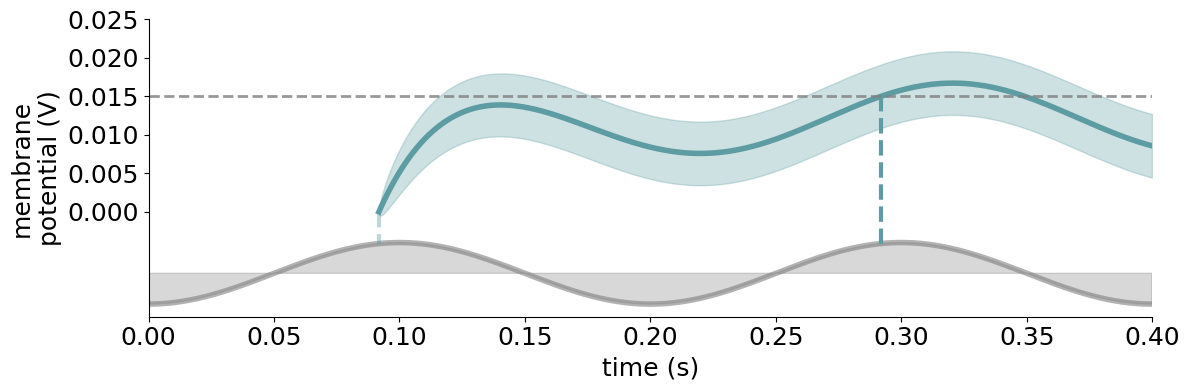

In [105]:
plt.figure(figsize=(12, 4))

shift = -int(phi_0 / (2 * np.pi * f) / dt)
t_temp = roll_with_nan(t, shift)
plt.plot(t_temp, V_traj, color='#5D9CA2', linewidth=4)   
plt.fill_between(t_temp, V_traj - V_sigma, V_traj + V_sigma, color='#5D9CA2', alpha=0.3)

# Plot the cosine oscillation
oscillation = I_osc * np.cos(2 * np.pi * f * t - np.pi) * 1e8 - 0.008
plt.plot(t, oscillation, '-', color='#7f7f7f', alpha=0.6, linewidth=4)

# Calculate the midpoint of the oscillation
midpoint = (np.max(oscillation) + np.min(oscillation)) / 2

# Fill between the midpoint line and the cosine wave for both peaks and troughs
plt.fill_between(t, midpoint, oscillation, where=(oscillation >= midpoint), color='#7f7f7f', alpha=0.3)
plt.fill_between(t, midpoint, oscillation, where=(oscillation < midpoint), color='#7f7f7f', alpha=0.3)

phi_0_time = phi_0/(2*np.pi*f)
phi_0_osc_value = I_osc * np.cos(2 * np.pi * f * phi_0_time - np.pi) * 1e8 - 0.008
plt.plot([phi_0_time, phi_0_time], [0, phi_0_osc_value], color='#5D9CA2', linestyle='--', linewidth=3, alpha=0.4)
plt.plot([phi_0_time+T, phi_0_time+T], [V_th, phi_0_osc_value], color='#5D9CA2', linestyle='--', linewidth=3, alpha=1)

plt.xlim(0, 0.4)

plt.axhline(V_th, color='#7f7f7f', linestyle='--', alpha=0.8, linewidth=2)

plt.xlabel('time (s)', fontsize=18)

# Update ylabel placement
plt.ylabel('membrane\npotential (V)', fontsize=18)

# Update legend position
#plt.legend(loc='center right', frameon=False, fontsize=14)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

# Remove y-ticks below 0
current_yticks = plt.gca().get_yticks()
new_yticks = [ytick for ytick in current_yticks if ytick >= 0]
plt.gca().set_yticks(new_yticks)

sb.despine()
plt.tight_layout()

plt.savefig('plots/fig3/fig3A_voltageTraj.svg', dpi=600)

plt.show()

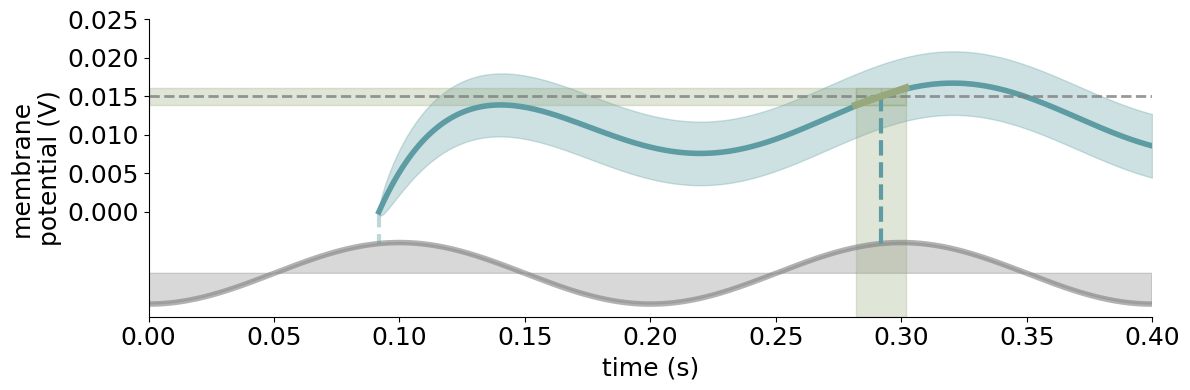

In [179]:
plt.figure(figsize=(12, 4))

dt = 1e-4

shift = -int(phi_0 / (2 * np.pi * f) / dt)
t_temp = roll_with_nan(t, shift)
plt.plot(t_temp, V_traj, color='#5D9CA2', linewidth=4)
plt.fill_between(t_temp, V_traj - V_sigma, V_traj + V_sigma, color='#5D9CA2', alpha=0.3)

# Plot the cosine oscillation
oscillation = I_osc * np.cos(2 * np.pi * f * t - np.pi) * 1e8 - 0.008
plt.plot(t, oscillation, '-', color='#7f7f7f', alpha=0.6, linewidth=4)

# Calculate the midpoint of the oscillation
midpoint = (np.max(oscillation) + np.min(oscillation)) / 2

# Fill between the midpoint line and the cosine wave for both peaks and troughs
plt.fill_between(t, midpoint, oscillation, where=(oscillation >= midpoint), color='#7f7f7f', alpha=0.3)
plt.fill_between(t, midpoint, oscillation, where=(oscillation < midpoint), color='#7f7f7f', alpha=0.3)

phi_0_time = phi_0 / (2 * np.pi * f)
phi_0_osc_value = I_osc * np.cos(2 * np.pi * f * phi_0_time - np.pi) * 1e8 - 0.008
plt.plot([phi_0_time, phi_0_time], [0, phi_0_osc_value], color='#5D9CA2', linestyle='--', linewidth=3, alpha=0.4)
plt.plot([phi_0_time + T, phi_0_time + T], [V_th, phi_0_osc_value], color='#5D9CA2', linestyle='--', linewidth=3, alpha=1)

plt.xlim(0, 0.4)

plt.axhline(V_th, color='#7f7f7f', linestyle='--', alpha=0.8, linewidth=2)

plt.xlabel('time (s)', fontsize=18)

# Update ylabel placement
plt.ylabel('membrane\npotential (V)', fontsize=18)

# Calculate the slope at the specific point
slope = voltage_dynamics(R_m, V_th, V_th, tau_m, I_s, I_osc, f)
x0 = phi_0_time + T
y0 = V_th

# Define small intervals for dt and dV
dt = 0.01  # Adjust this value based on the scale of your plot
dV = slope * dt

# Plot the tangent line to visualize the slope
x_tangent = [x0 - dt, x0 + dt]
y_tangent = [y0 - dV, y0 + dV]
plt.plot(x_tangent, y_tangent, color='#97A97C', linewidth=5)

# Define the color for the shaded areas
shade_alpha = 0.3
shade_color = '#97A97C'

# Get the current y-limits to restore later
current_ylim = plt.ylim()

# Vertical shaded area under the slope line, extending fully to the bottom of the plot
plt.fill_betweenx([plt.ylim()[0], y0 - dV], x0 - dt, x0 + dt, color=shade_color, alpha=shade_alpha)
plt.fill_betweenx([y0 - dV, y0 + dV], x0 - dt, x0, color=shade_color, alpha=shade_alpha)
plt.fill_betweenx([y0 - dV, y0 + dV], x0, x0 + dt, color=shade_color, alpha=shade_alpha)

# Horizontal shaded area under the slope line
plt.fill_between([0, x0 - dt], y0 - dV, y0 + dV, color=shade_color, alpha=shade_alpha)
plt.fill_between([x0 - dt, x0 + dt], y0 - dV, y0, color=shade_color, alpha=shade_alpha)
plt.fill_between([x0 - dt, x0 + dt], y0, y0 + dV, color=shade_color, alpha=shade_alpha)

# Restore the y-limits
plt.ylim(current_ylim)

# Update legend position and other plot settings
#plt.legend(loc='center right', frameon=False, fontsize=14)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

# Remove y-ticks below 0
current_yticks = plt.gca().get_yticks()
new_yticks = [ytick for ytick in current_yticks if ytick >= 0]
plt.gca().set_yticks(new_yticks)

sb.despine()
plt.tight_layout()

plt.savefig('plots/fig3/fig3A_voltageTraj_with_shaded_derivative.svg', dpi=600)
plt.show()

## B - 